In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator # Data Augmentation Package
from keras.utils import img_to_array, array_to_img, load_img
import matplotlib.pyplot as plt

In [ ]:
# Load the image for data augmentation

image_file = "/content/Puppy.jpg"
dog_image = keras.preprocessing.image.load_img(image_file)
dog_array = keras.preprocessing.image.img_to_array(dog_image) # array- 1D
dog = dog_array.reshape((1,)+ dog_array.shape) # matrix 2D

In [ ]:
print(dog_image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=700x467 at 0x7C9B603879D0>


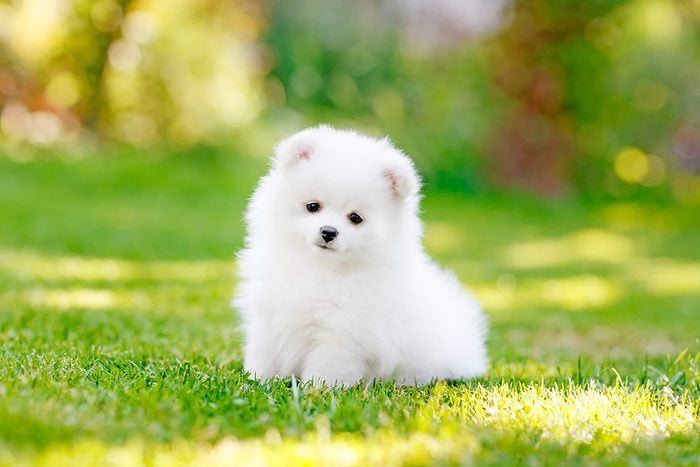

In [ ]:
dog_image

In [ ]:
print(dog_array.shape)

(467, 700, 3)


In [ ]:
print(dog.shape)

(1, 467, 700, 3)


In [ ]:
# Data Augmentation

def plot_image(original_image, updated_image):
  plt.figure(figsize = (15,10))

  # original image
  plt.subplot(1,2,1)
  plt.title("Original Image")
  plt.imshow(original_image)

  # Augmented Image
  plt.subplot(1,2,2)
  plt.title("Transformed Image")
  plt.imshow(updated_image)

  plt.show()

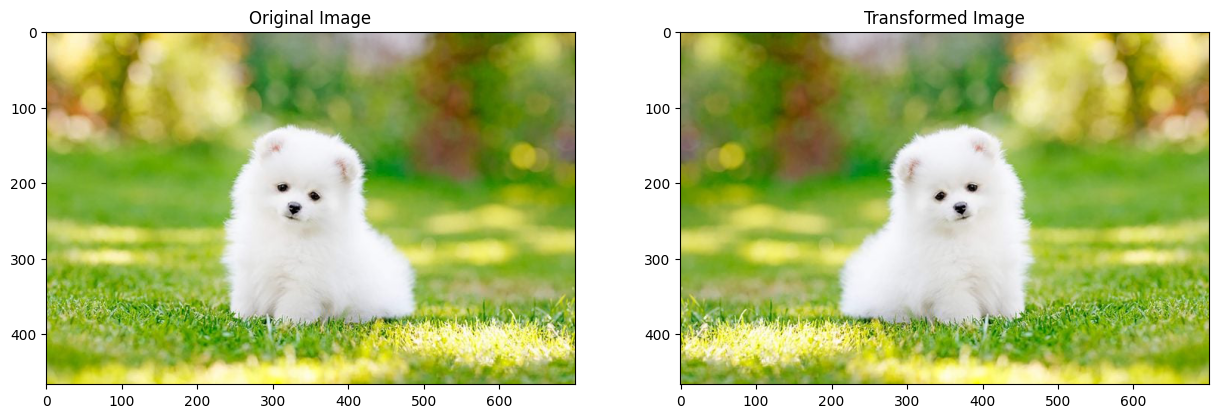

In [ ]:
# Horizontal Flip the image

transformed_fn = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_image(dog_image, transformed_image)
plt.show()

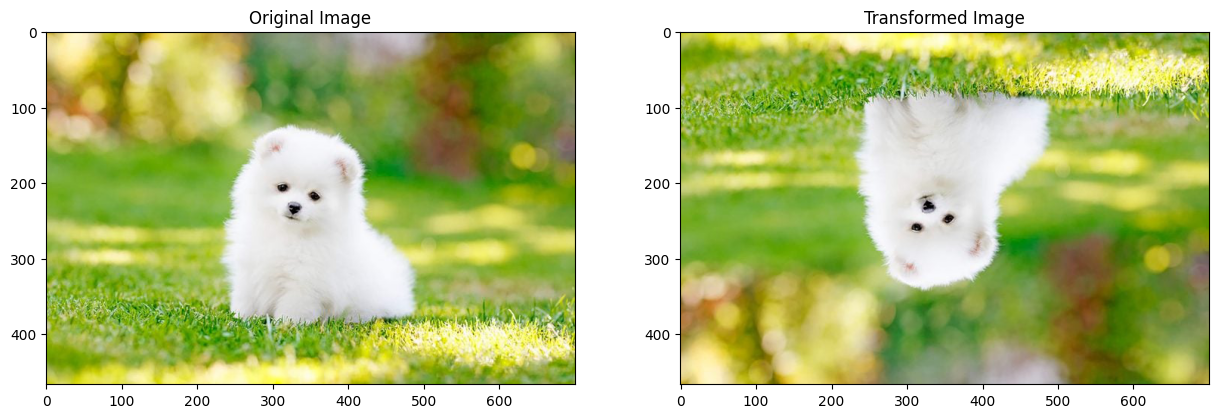

In [ ]:
# Flip the image

transformed_fn = keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_image(dog_image, transformed_image)
plt.show()

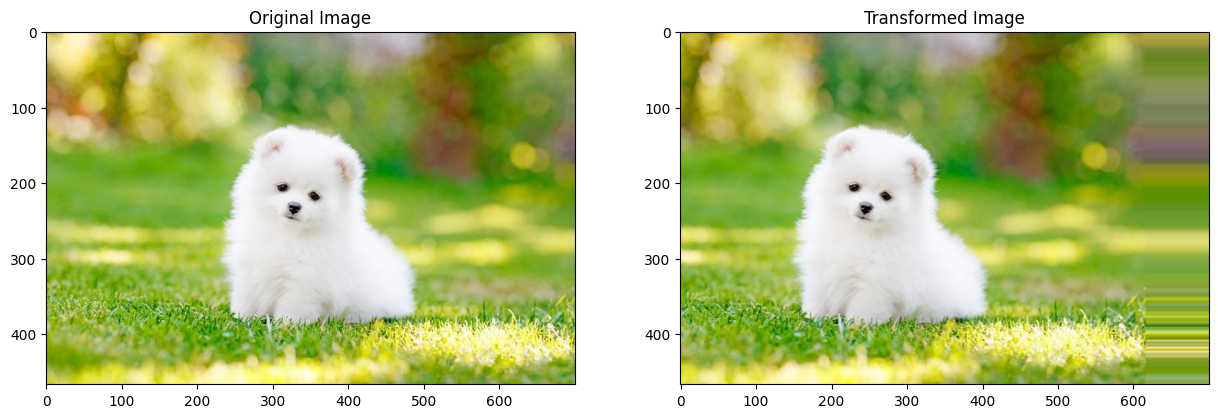

In [ ]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.4)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_image(dog_image, transformed_image)
plt.show()

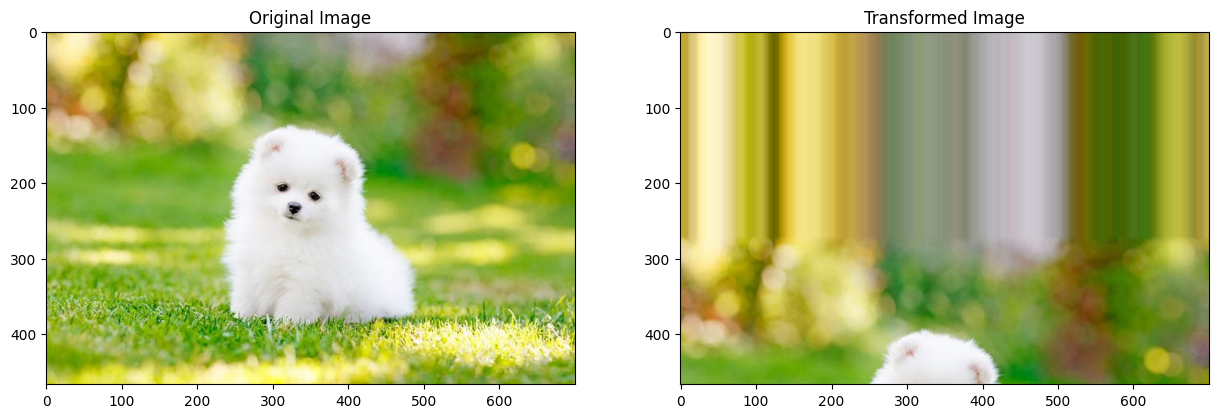

In [ ]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.4)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_image(dog_image, transformed_image)
plt.show()

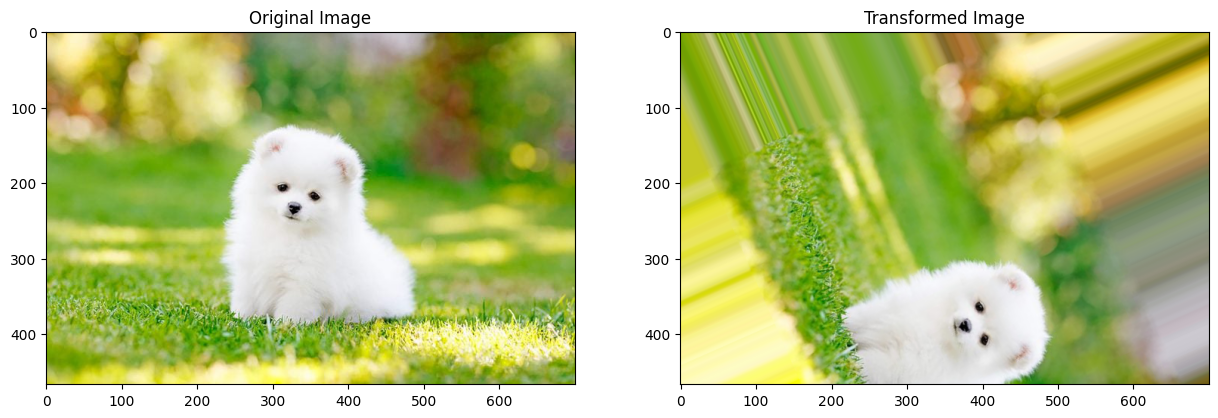

In [ ]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(rotation_range=90)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_image(dog_image, transformed_image)
plt.show()

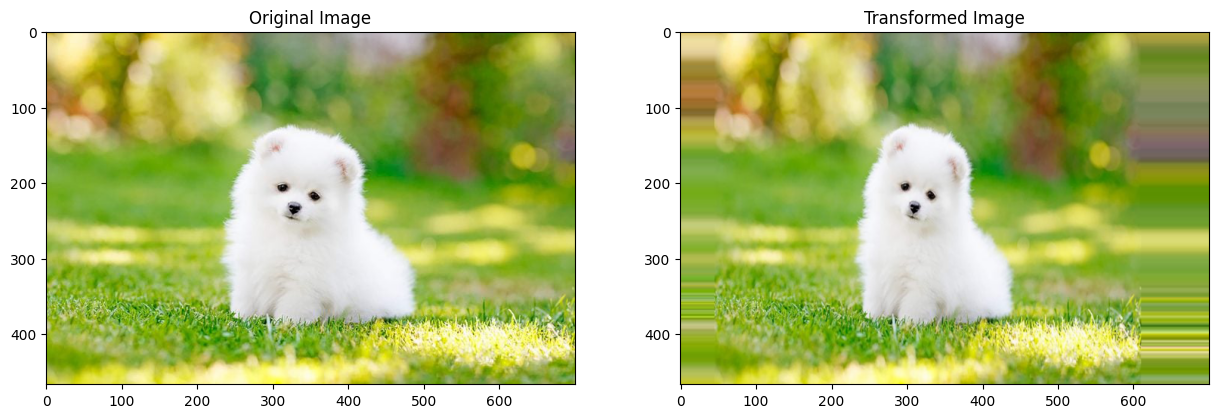

In [ ]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(zoom_range=0.5)
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_image(dog_image, transformed_image)
plt.show()

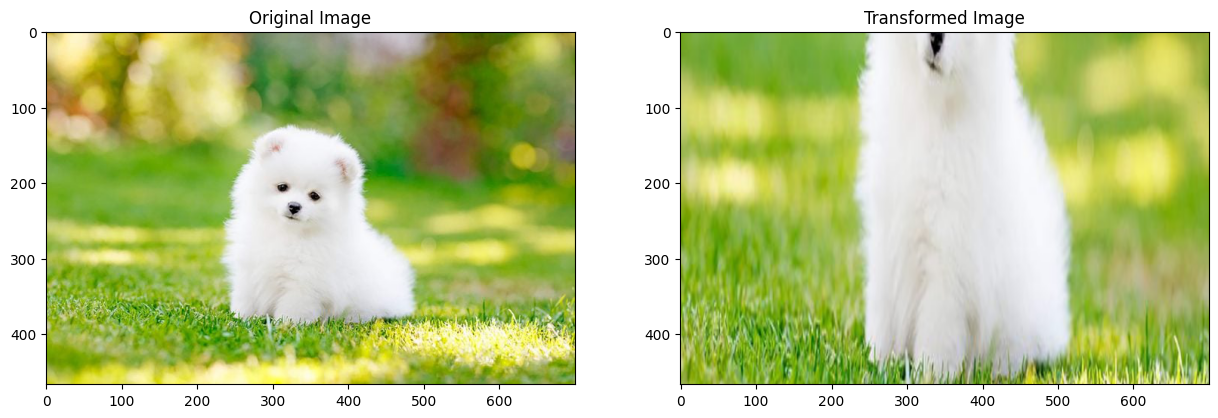

In [ ]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(zoom_range=[1.0,0.0])
transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_image(dog_image, transformed_image)
plt.show()

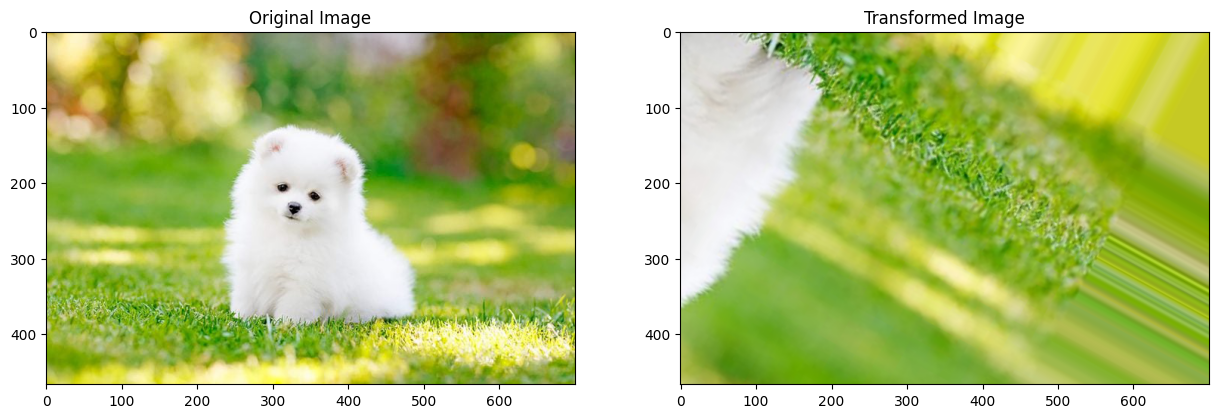

In [ ]:
transformed_fn = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5, rotation_range=45, width_shift_range=0.4, height_shift_range=0.4,
    vertical_flip = True, shear_range=0.1, horizontal_flip=True,
    rescale= 1./255)

transformed_array = transformed_fn.random_transform(dog_array)
transformed_image = keras.preprocessing.image.array_to_img(transformed_array)
plot_image(dog_image, transformed_image)
plt.show()

In [ ]:
directory = '/content/sample_data'

i = 0

for batch in transformed_fn.flow(dog, batch_size = 1, save_to_dir= directory, save_prefix= 'dog_image', save_format='jpg'):
  i+=1
  if i > 20:
    break



### LeNet 5
#### CIFAR-10 Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential

In [ ]:
# Load CIFAR 10 Dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# Label	Description
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

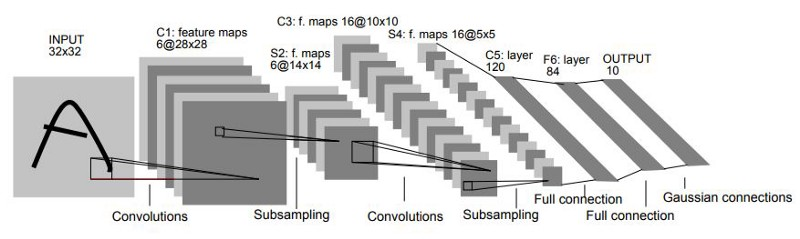

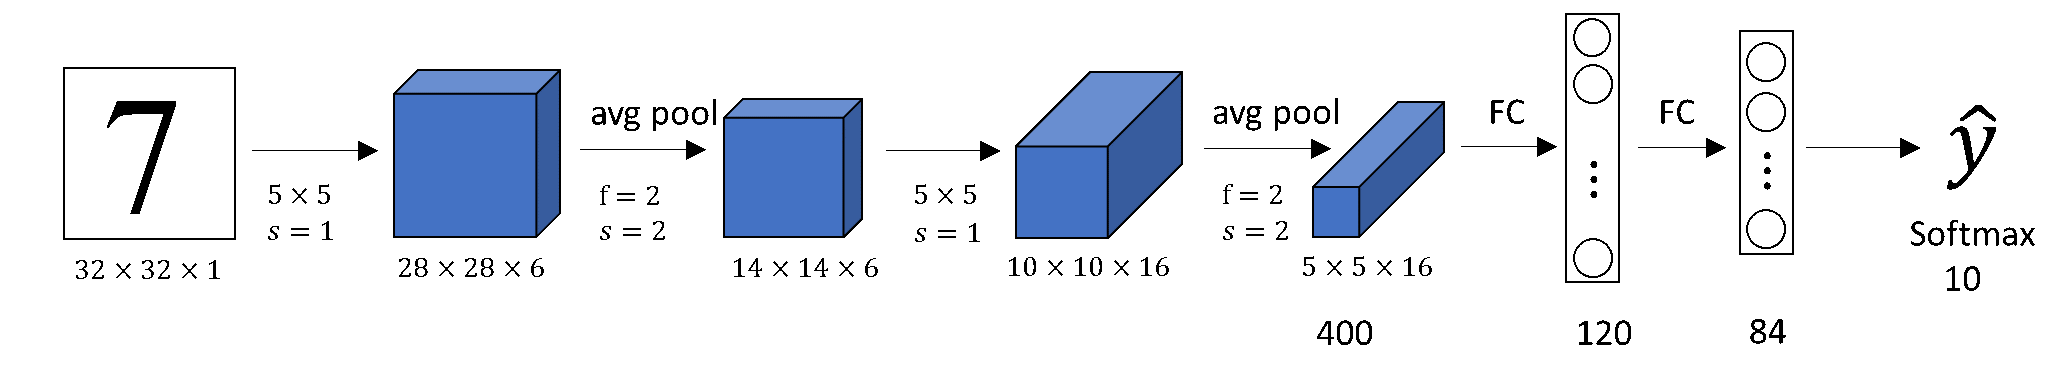

In [ ]:
model = Sequential()

# CovNet 1
model.add(Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape= (32,32,3)))

# Subsampling(Pooling)
model.add(AveragePooling2D(pool_size=(2,2), strides=2))

# ConvNet-2
model.add(Conv2D(16, kernel_size=(5,5), activation = 'tanh'))

# Subsampling(Pooling)
model.add(AveragePooling2D(pool_size=(2,2), strides=2))

# Flatten
model.add(Flatten())

# DNN 1
model.add(Dense(120, activation= 'tanh'))

# DNN 2
model.add(Dense(84, activation= 'tanh'))

# DNN 3
model.add(Dense(10, activation= 'softmax'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [ ]:
# Compile the model

model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Fit the model

history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data= (x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 10s 5ms/step - loss: 1.7833 - accuracy: 0.3696 - val_loss: 1.6472 - val_accuracy: 0.4183
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5202 - accuracy: 0.4608 - val_loss: 1.4451 - val_accuracy: 0.4847
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3904 - accuracy: 0.5076 - val_loss: 1.3662 - val_accuracy: 0.5181
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3089 - accuracy: 0.5376 - val_loss: 1.3244 - val_accuracy: 0.5309
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2525 - accuracy: 0.5565 - val_loss: 1.3356 - val_accuracy: 0.5246
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2036 - accuracy: 0.5743 - val_loss: 1.3207 - val_accuracy: 0.5358
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1641 - accuracy: 0.5893 - val_loss: 1.2911 - val_accuracy

# Model 2

In [ ]:
model2 = Sequential()

# CovNet 1
model2.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape= (32,32,3)))

# Subsampling(Pooling)
model2.add(MaxPooling2D(pool_size=(2,2), strides=2))

# ConvNet-2
model2.add(Conv2D(16, kernel_size=(5,5), activation = 'relu'))

# Subsampling(Pooling)
model2.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Flatten
model2.add(Flatten())

# DNN 1
model2.add(Dense(120, activation= 'relu'))

# DNN 2
model2.add(Dense(84, activation= 'relu'))

# DNN 3
model2.add(Dense(10, activation= 'softmax'))


In [ ]:
# Compile the model

model2.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Fit the model

history = model2.fit(x_train, y_train, batch_size=32, epochs=30, validation_data= (x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 10s 5ms/step - loss: 1.6354 - accuracy: 0.4060 - val_loss: 1.4366 - val_accuracy: 0.4717
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3260 - accuracy: 0.5256 - val_loss: 1.2713 - val_accuracy: 0.5436
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2121 - accuracy: 0.5689 - val_loss: 1.2161 - val_accuracy: 0.5679
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1355 - accuracy: 0.5960 - val_loss: 1.1838 - val_accuracy: 0.5861
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0738 - accuracy: 0.6184 - val_loss: 1.1583 - val_accuracy: 0.6027
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0229 - accuracy: 0.6394 - val_loss: 1.2079 - val_accuracy: 0.5853
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9780 - accuracy: 0.6522 - val_loss: 1.1172 - val_accuracy

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
# Model 3 - Adding Dropout & BatchNormalization to DNN


model3 = Sequential()

# CovNet 1
model3.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape= (32,32,3)))
model3.add(BatchNormalization())

# Subsampling(Pooling)
model3.add(MaxPooling2D(pool_size=(2,2), strides=2))

# ConvNet-2
model3.add(Conv2D(16, kernel_size=(5,5), activation = 'relu'))
model3.add(BatchNormalization())

# Subsampling(Pooling)
model3.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Flatten
model3.add(Flatten())

# DNN 1
model3.add(Dense(120, activation= 'relu'))
model3.add(Dropout(0.25))
model3.add(BatchNormalization())

# DNN 2
model3.add(Dense(84, activation= 'relu'))
model3.add(Dropout(0.25))
model3.add(BatchNormalization())

# DNN 3
model3.add(Dense(10, activation= 'softmax'))


# Compile the model

model3.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Fit the model

history3 = model3.fit(x_train, y_train, batch_size=32, epochs=30, validation_data= (x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 68s 8ms/step - loss: 1.7489 - accuracy: 0.3702 - val_loss: 1.4106 - val_accuracy: 0.4879
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4369 - accuracy: 0.4858 - val_loss: 1.4701 - val_accuracy: 0.4816
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3296 - accuracy: 0.5276 - val_loss: 1.2030 - val_accuracy: 0.5656
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2535 - accuracy: 0.5573 - val_loss: 1.2236 - val_accuracy: 0.5640
Epoch 5/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1956 - accuracy: 0.5791 - val_loss: 1.1648 - val_accuracy: 0.5857
Epoch 6/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1587 - accuracy: 0.5907 - val_loss: 1.0964 - val_accuracy: 0.6031
Epoch 7/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1251 - accuracy: 0.6029 - val_loss: 1.2126 - val_ac